## Classification using K-Nearest Neighboars Algorithm

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('heart_disease.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,yes
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,yes
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,yes
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,yes
4,57,male,0,140,192,0,1,148,0,0.4,1,0,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,63,female,0,124,197,0,1,136,1,0.0,1,0,2,no
289,57,female,0,140,241,0,1,123,1,0.2,1,0,3,no
290,45,male,3,110,264,0,1,132,0,1.2,1,0,3,no
291,68,male,0,144,193,1,1,141,0,3.4,1,2,3,no


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    object 
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    int64  
 4   chol      293 non-null    int64  
 5   fbs       293 non-null    int64  
 6   restecg   293 non-null    int64  
 7   thalach   293 non-null    int64  
 8   exang     293 non-null    int64  
 9   oldpeak   293 non-null    float64
 10  slope     293 non-null    int64  
 11  ca        293 non-null    int64  
 12  thal      293 non-null    int64  
 13  target    293 non-null    object 
dtypes: float64(1), int64(11), object(2)
memory usage: 32.2+ KB


## Encoding

In [4]:
dataset.sex.unique()

array(['male', 'female'], dtype=object)

In [5]:
dataset.fbs.unique()

array([1, 0], dtype=int64)

In [6]:
from sklearn.preprocessing import LabelEncoder
for col in ['sex','target']:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

In [7]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
289,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


## Split Data

In [8]:
x=dataset.drop('target',axis=1)
y=dataset['target']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25, random_state=0)

In [10]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
226,64,1,0,120,246,0,0,96,1,2.2,0,1,2
285,67,1,2,152,212,0,0,150,0,0.8,1,0,3
209,43,0,0,132,341,1,0,136,1,3.0,1,0,3
171,60,1,0,117,230,1,1,160,1,1.4,2,2,3
118,41,0,2,112,268,0,0,172,1,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,60,1,0,145,282,0,0,142,1,2.8,1,2,3
160,67,1,0,160,286,0,0,108,1,1.5,1,3,2
214,55,1,0,140,217,0,1,111,1,5.6,0,0,3
167,58,1,1,120,284,0,0,160,0,1.8,1,0,2


In [11]:
y_test

226    0
285    0
209    0
171    0
118    1
      ..
187    0
160    0
214    0
167    0
153    1
Name: target, Length: 74, dtype: int32

## KNN Model

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knnModel=KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_predicted=knnModel.predict(X_test)
y_predicted

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0])

## Model Evaluation

In [14]:
from sklearn.metrics import accuracy_score
print('K-Nearst Neighbors accuracy(in%):',
     accuracy_score(y_test,y_predicted)*100)

K-Nearst Neighbors accuracy(in%): 64.86486486486487


In [15]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
print('K-Nearst Neighbors accuracy(in%):',
     accuracy_score(y_test,y_predicted)*100)

K-Nearst Neighbors accuracy(in%): 64.86486486486487


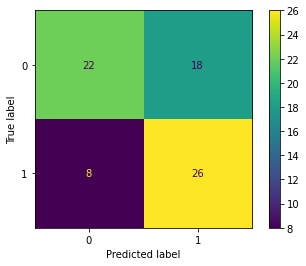

In [16]:
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_predicted)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=knnModel.classes_)
disp.plot()
plt.show()
